In [65]:
import pandas as pd
A=A=pd.read_csv("C:/Users/Admin/Desktop/New folder/Credit.csv")

In [66]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [67]:
CAT=[]
CON=[]
for i in A.columns:
    if (A[i].dtypes=="object"):
        CAT.append(i)
    else:
        CON.append(i)

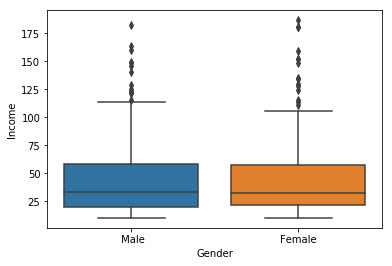

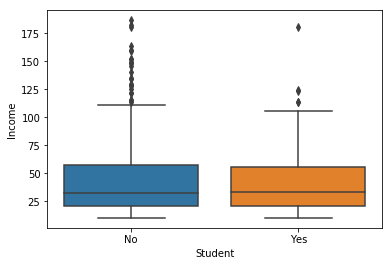

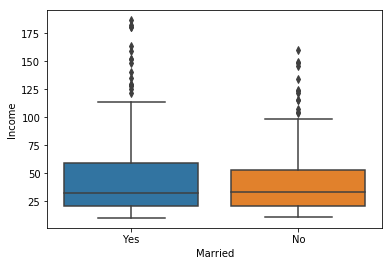

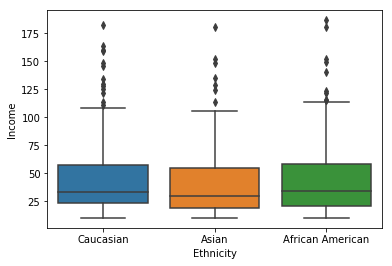

In [68]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in CAT:
    sb.boxplot(A[i],A.Income)
    plt.show()

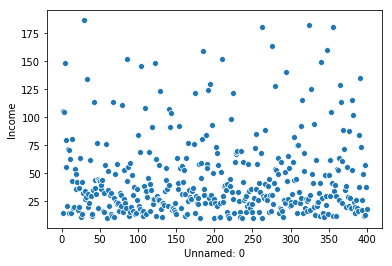

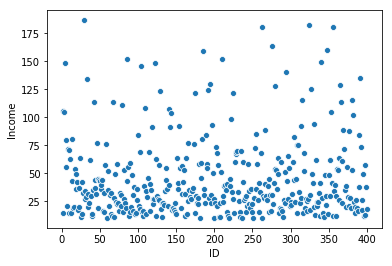

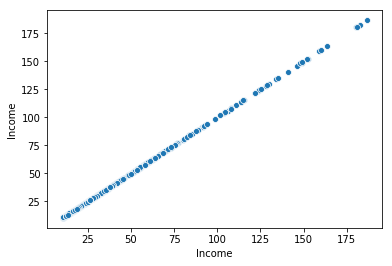

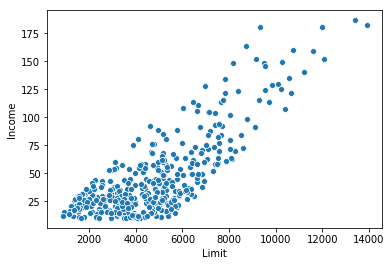

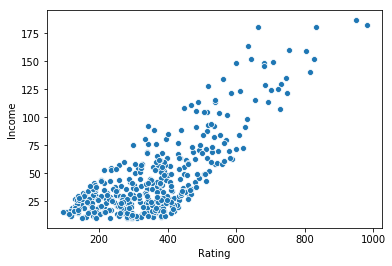

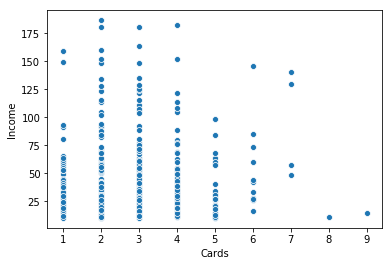

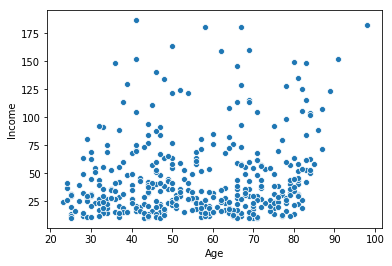

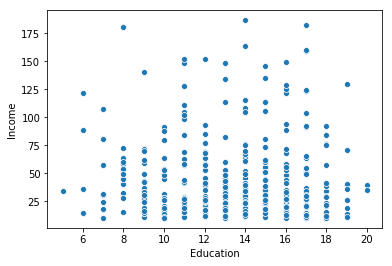

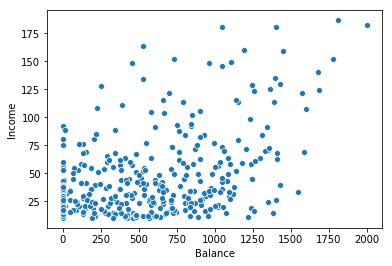

In [69]:
for i in CON:
    sb.scatterplot(A[i],A.Income)
    plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A.apply(le.fit_transform)

In [71]:
B.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,4,294,215,143,1,45,11,0,0,1,2,66


In [82]:
Y=B[["Income"]]
X=B[B.columns[~B.columns.isin(['income','Unnamed: 0'])]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

In [87]:
X

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0,43,131,99,1,11,6,0,0,1,2,67
1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,294,215,143,1,45,11,0,0,1,2,66
5,5,344,355,249,3,54,5,0,0,0,2,243
6,6,99,117,81,1,14,7,1,0,0,0,41
7,7,333,330,230,1,64,4,0,0,0,1,190
8,8,47,113,88,4,43,8,1,0,0,2,56
9,9,332,321,222,2,18,14,1,1,1,0,261


In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,30)}
cv = GridSearchCV(knn,tp,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
cv.best_params_

{'n_neighbors': 5}

In [85]:
knn=KNeighborsRegressor(n_neighbors=5)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [86]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

15.013333333333332

# knn classifier

In [77]:
Y=B[["Ethnicity"]]
X=B[B.columns[~B.columns.isin(['Ethnicity','Unnamed: 0'])]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=30)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,30)}
cv = GridSearchCV(knn,tp,scoring="accuracy",cv=3)
cvmodel = cv.fit(xtrain,ytrain)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

In [79]:
cv.best_params_

{'n_neighbors': 28}

In [80]:
knn=KNeighborsClassifier(n_neighbors=28)
model=knn.fit(xtrain,ytrain)
pred=model.predict(xtest)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.4666666666666667